# Notes

In [54]:
import pandas as pd
import geopandas as geo
import numpy as np

manipulation_geometry = 'EPSG:3857'
plot_geometry = 'WGS84'

In [24]:
folder = '/home/minigonche/Dropbox/Projects/malaria_mining/data/pipeline_data/raw/geo/countries/'
col = geo.read_file(folder + 'colombia/colombia.shp')
ecu = geo.read_file(folder + 'ecuador/ecuador.shp')
ven = geo.read_file(folder + 'venezuela/venezuela.shp')
pan = geo.read_file(folder + 'panama/panama.shp')
per = geo.read_file(folder + 'peru/peru.shp')
bra = geo.read_file(folder + 'brasil/brasil.shp')

other = [ecu,ven,pan, per, bra]
other_names = ['Ecuador', 'Venezuela', 'Panama', 'Peru', 'Brazil']


buffer = 25 # Km
manipulation_geoemtry = 'EPSG:3395'
plot_geoemtry = 'WGS84'


In [29]:

values = []
geometries = []
for i in range(len(other)):
    o = other[i]
    new_geo = col.geometry.to_crs(manipulation_geoemtry).buffer(buffer*1000).intersection(o.geometry.to_crs(manipulation_geoemtry)).to_crs(plot_geoemtry).values[0]
    values.append({'frontera': other_names[i]})
    geometries.append(new_geo)
    

fronteras = geo.GeoDataFrame(values, geometry=geometries, crs=plot_geoemtry)
fronteras


,frontera,geometry
0,Ecuador,"MULTIPOLYGON (((-75.46894 -0.31011, -75.47533 ..."
1,Venezuela,"MULTIPOLYGON (((-71.91876 11.27500, -71.92148 ..."
2,Panama,"MULTIPOLYGON (((-78.04859 7.43029, -78.04776 7..."
3,Peru,"POLYGON ((-70.18898 -4.32109, -70.19528 -4.311..."
4,Brazil,"MULTIPOLYGON (((-66.67052 1.04202, -66.68646 1..."


<AxesSubplot:>

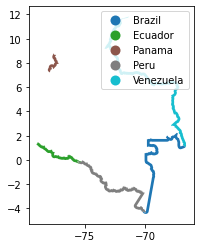

In [36]:
fronteras['id'] = range(fronteras.shape[0])
fronteras.plot(column = 'frontera', legend = True)

In [35]:
fronteras.to_file('/home/minigonche/Dropbox/Projects/malaria_mining/data/pipeline_data/raw/geo/frontiers/frontiers.shp', index = False)

In [60]:
rivers = geo.read_file('/home/minigonche/Dropbox/Projects/malaria_mining/data/pipeline_data/raw/geo/river_lines/river_lines.shp')
rivers = rivers[['NOMBRE_GEO','geometry']].dissolve(by = 'NOMBRE_GEO', aggfunc='sum')
rivers

,geometry
NOMBRE_GEO,
<NULL>,"MULTILINESTRING ((-77.96686 2.42443, -77.96692..."
ANTIGUO CAUCE RÍO NECHÍ,"MULTILINESTRING ((-74.80263 7.61373, -74.80265..."
ARROY JIPUMAHANA,"MULTILINESTRING ((-71.64509 12.27420, -71.6450..."
ARROYO ARIATU,"MULTILINESTRING ((-71.71448 12.17697, -71.7142..."
ARROYO CAYUCHAIN,"MULTILINESTRING ((-71.87161 11.83185, -71.8714..."
...,...
RÍO ZULIA,"MULTILINESTRING ((-72.62644 7.85872, -72.62639..."
RÍO ZUNGO,"MULTILINESTRING ((-76.75290 7.87929, -76.75295..."
RÍO ÑAMBÍ,"MULTILINESTRING ((-78.03249 1.39540, -78.03249..."


In [61]:
bounds = rivers.geometry.to_crs(manipulation_geometry).bounds
rivers['length'] = np.sqrt((bounds.minx - bounds.maxx)**2 + (bounds.miny - bounds.maxy)**2)/1000
rivers = rivers.sort_values('length', ascending = False).reset_index()
rivers

,NOMBRE_GEO,geometry,length
0,RÍO NEGRO,"MULTILINESTRING ((-76.01290 2.54306, -76.01272...",1276.289905
1,RÍO MAGDALENA,"MULTILINESTRING ((-76.19891 1.86418, -76.19912...",1073.933830
2,RÍO SAN FRANCISCO,"MULTILINESTRING ((-76.45691 2.38517, -76.45709...",1070.252064
3,RÍO SAN JUAN,"MULTILINESTRING ((-76.59013 0.61948, -76.59047...",1031.626357
4,RÍO AGUA CLARA,"MULTILINESTRING ((-77.82553 1.66660, -77.82490...",1011.960731
...,...,...,...
1929,RÍO TOLOTA,"LINESTRING (-73.37041 6.11405, -73.37046 6.114...",0.364620
1930,BRAZO PALOMINO,"MULTILINESTRING ((-78.03509 2.42439, -78.03513...",0.359070
1931,ESTERO HEREDA,"MULTILINESTRING ((-78.31501 2.44650, -78.31506...",0.279873
1932,RIO SENCELLA,"MULTILINESTRING ((-75.15545 0.40981, -75.15553...",0.193414


In [69]:
rivers_clean = rivers[rivers.NOMBRE_GEO.apply(lambda s: 'RÍO' in s)]
rivers_clean

,NOMBRE_GEO,geometry,length
0,RÍO NEGRO,"MULTILINESTRING ((-76.01290 2.54306, -76.01272...",1276.289905
1,RÍO MAGDALENA,"MULTILINESTRING ((-76.19891 1.86418, -76.19912...",1073.933830
2,RÍO SAN FRANCISCO,"MULTILINESTRING ((-76.45691 2.38517, -76.45709...",1070.252064
3,RÍO SAN JUAN,"MULTILINESTRING ((-76.59013 0.61948, -76.59047...",1031.626357
4,RÍO AGUA CLARA,"MULTILINESTRING ((-77.82553 1.66660, -77.82490...",1011.960731
...,...,...,...
1869,RÍO PALOMA,"MULTILINESTRING ((-75.09110 5.68484, -75.09125...",0.969546
1891,RÍO APARTADO,"MULTILINESTRING ((-77.02055 5.40393, -77.02064...",0.846318
1894,RÍO TOY,"MULTILINESTRING ((-75.26994 3.95226, -75.26994...",0.813432
1925,RÍO LAS PIEDRAS,"MULTILINESTRING ((-76.83146 2.36926, -76.83154...",0.405324


In [ ]:
rivers_clean.rename(columns = '')

<AxesSubplot:>

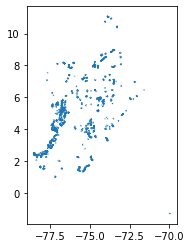

In [47]:
rivers[rivers.NOMBRE_GEO.apply(lambda s: 'QUEBRADA' in s)].plot()

In [49]:
geo.sjoin(rivers, rivers.iloc[[1833]])



,NOMBRE_GEO_left,geometry,length_left,index_right,NOMBRE_GEO_right,length_right
338,RIO SEQUIHONDA,"MULTILINESTRING ((-78.05092 2.43203, -78.05130...",28.816120,1833,QUEBRADA COROCITO,1.141714
1141,BRAZO EL SECADERO,"MULTILINESTRING ((-78.04099 2.45752, -78.04116...",4.725087,1833,QUEBRADA COROCITO,1.141714
1833,QUEBRADA COROCITO,"MULTILINESTRING ((-78.04099 2.45752, -78.04116...",1.141714,1833,QUEBRADA COROCITO,1.141714


<AxesSubplot:>

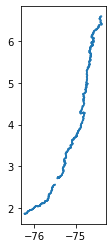

<AxesSubplot:>

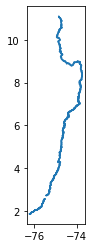

In [8]:
mag.head(1).plot()